# "your_off_facebook_activity Report"
#### EMAT 22110 - Data in Emerging Media and Technology
#### Author: Kerri Donaldson
#### Created: 2/25/21
#### Last Updated: 3/2/21

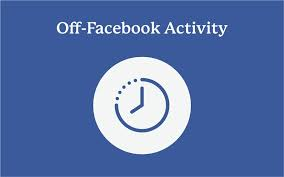
https://lumenad.com/facebooks-clear-history/

### 1. Overview
In this report I will be breaking down the data to understand what facebook knows about me. My question/hypothesis is if facebook knows a lot about me even if I do not use facebook that often.

In [218]:
import json
from datetime import datetime 
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd
from scipy import stats

load in json

In [219]:
with open('C:/Users/kdona/Desktop/facebook-kerridonaldson583/ads_and_businesses/your_off-facebook_activity.json') as f:
    act = json.load(f)
act.keys()

dict_keys(['off_facebook_activity'])

### 2. The Data
I got this data by going to my facebook account and clicking on the drop down button on the top right corner. Then I went to my settingas and clicked on the tab that said "Your Facebook information" There are multiple buttons from there that can be clicked on to download but I chose "Download your Information".

I do not necessarily trust facebook because I have always been told that it can get data about you without giving it the data. So this is also how I know that most of the data Facebook had about me is accurate.

In [220]:
type(act['off_facebook_activity'])

list

In [221]:
act['off_facebook_activity'][0]

{'name': 'mylovedmeow.com',
 'events': [{'id': 869936280417305,
   'type': 'VIEW_CONTENT',
   'timestamp': 1611513180}]}

In [222]:
act['off_facebook_activity'][0].keys()

dict_keys(['name', 'events'])

In [223]:
type(act)

dict

In [224]:
act.keys()

dict_keys(['off_facebook_activity'])

convert to DataFrame

In [225]:
act_df = pd.DataFrame(act['off_facebook_activity'], columns = ['name', 'events' ])
act_df.head()

,name,events
0,mylovedmeow.com,"[{'id': 869936280417305, 'type': 'VIEW_CONTENT..."
1,lulus.com,"[{'id': 1629647940648665, 'type': 'PAGE_VIEW',..."
2,popsockets.com,"[{'id': 161049324437142, 'type': 'PAGE_VIEW', ..."
3,linqapp.com,"[{'id': 3001627433285534, 'type': 'VIEW_CONTEN..."
4,DT Client Services LLC,"[{'id': 280069916314923, 'type': 'CUSTOM', 'ti..."


###### Theoretical Hypothesis 
Does this data show a lot about me? or does it only have a general idea about who I am?

In [226]:
act['off_facebook_activity'][0]['events'][0]['timestamp']

1611513180

In [227]:
act['off_facebook_activity'][0]['events'][0]['type'] 

'VIEW_CONTENT'

### 3. Data Preparation
Go over each piece of data and let the loop decide which are 

In [228]:
apps = []
events = []
actapp = []
custom = []
search = []
viewc = []
ad = []
view = []

for i in act['off_facebook_activity']:
    apps.append(i['name'])
    events.append((len(i['events'])))
    actapp.append(len([x for x in i['events'] if x['type'] == 'ACTIVATE_APP']))
    custom.append(len([x for x in i['events'] if x['type'] == 'CUSTOM']))
    viewc.append(len([x for x in i['events'] if x['type'] == 'VIEW_CONTENT']))
    view.append(len([x for x in i['events'] if x['type'] == 'PAGE_VIEW']))

In [229]:
appbyevent = pd.DataFrame(columns = ('App', 'Event Count', 'Custom', 'View Content', 'Page Views'))
appbyevent['App'] = apps
appbyevent['Event Count'] = events
appbyevent['Custom'] = custom
appbyevent['View Content'] = viewc
appbyevent['Page Views'] = view
appbyevent.head()

,App,Event Count,Custom,View Content,Page Views
0,mylovedmeow.com,1,0,1,0
1,lulus.com,1,0,0,1
2,popsockets.com,3,0,0,3
3,linqapp.com,1,0,1,0
4,DT Client Services LLC,6,6,0,0


In [230]:
sub_apps = appbyevent[['App', 'Event Count', 'Custom', 'View Content', 'Page Views']].loc[appbyevent['Event Count'] ]
sub_apps

,App,Event Count,Custom,View Content,Page Views
1,lulus.com,1,0,0,1
1,lulus.com,1,0,0,1
3,linqapp.com,1,0,1,0
1,lulus.com,1,0,0,1
6,twentytwowords.com,13,3,0,9
1,lulus.com,1,0,0,1
13,storemaven.com,1,1,0,0
2,popsockets.com,3,0,0,3
1,lulus.com,1,0,0,1
7,motorious.com,2,0,0,1


In [249]:
count_act = act_df.groupby('name').count()
count_act.head()

,events
name,
DT Client Services LLC,1
Data Trust,1
bgsu.edu,1
change.org,1
elitedaily.com,1


In [256]:
rand_act = list(count_act.index)

In [257]:
sample_act = count_act.loc[rand_act]
sample_act

,events
name,
DT Client Services LLC,1
Data Trust,1
bgsu.edu,1
change.org,1
elitedaily.com,1
eventbrite.com,1
linqapp.com,1
lulus.com,1
motorious.com,1


In [260]:
stats.chisquare(sample_act['events'])

Power_divergenceResult(statistic=0.0, pvalue=1.0)

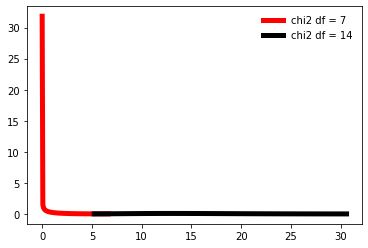

In [277]:
fig, ax1 = plt.subplots(1,1)
df1 = 1
x1 = np.linspace(stats.chi2.ppf(0.01, df1), stats.chi2.ppf(0.99, df1), 100)
ax1.plot(x1, stats.chi2.pdf(x1, df1), 'r-', lw = 5, label = 'chi2 df = 7')
df2 = 15
x2 = np.linspace(stats.chi2.ppf(0.01, df2), stats.chi2.ppf(0.99, df2), 100)
ax1.plot(x2, stats.chi2.pdf(x2, df2), 'k-', lw = 5, label = 'chi2 df = 14')
ax1.legend(loc = 'best', frameon = False)
plt.show()

In [264]:
sample_act['events'].mean()

1.0

### 4. Data Visualization
I chose to do a bar graph in hopes of showing how many sites were recorded and how many times I visited those websiotes.

In [243]:
s = [len(x) for x in act['off_facebook_activity']]
s[:]

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]

(array([ 0.,  0.,  0.,  0.,  0., 15.,  0.,  0.,  0.,  0.]),
 array([1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5]),
 <BarContainer object of 10 artists>)

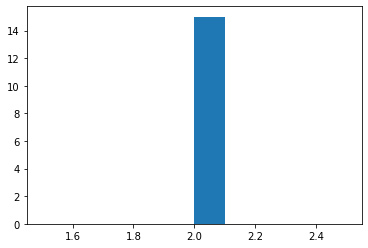

In [244]:
plt.hist(s)

## 5. Conclusions

From this report I learned that I use Facebook a lot less than I thought I did. Before this I knew that I did not use it a lot but this proves that I use it a lot less than I originally thought. My original question was if Facebook knew a lot about me from my activity and it seems that it does not. I am happy about this because I do not want anyone to use my information against me.

## 6. Limitations, Alternative Approaches, and Next Steps

There were many limitations for me while doing this report. I am not an active user of Facebook so my data visualisation does not show a lot of data and is kind of boring to look at. A next step might be to try another person's data or I could use Facebook some more and download my data again to see better what data Facebook has collected about me.